<a href="https://colab.research.google.com/github/jaesunkkk/22/blob/main/1126%EB%B0%9C%ED%91%9C(%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%2C_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model2. Random Forest Classifier

-랜덤포레스트: 결정 트리의 앙상블(일련의 예측기)

In [ ]:
#RandomForestClassifier 클래스 import, 모델 생성
from sklearn.ensemble import RandomForestClassifier
#n_estimators: 결정트리의 개수
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10)
#피팅하여 학습시킨뒤에 예측성능 측정
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_train)
#F1 score는 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred)) #예측 정확도

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.6953383552760732
Validation Mean Accuracy:  0.79428983714698


In [ ]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy : ", accuracy_score(y_test, y_pred))
print("Test F1 Score : ", f1_score(y_test, y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy :  0.8536585365853658
Test F1 Score :  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


In [ ]:
#결정 트리 분류기와 같은 결과나옴.

#Model 3: Logistic Regression

- 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘

- 데이터가 클래스에 속할지 말지 결정할 확률 컷오프를 Threshold(임계값)이라 한다. 기본 값은 0.5이지만 데이터의 특성이나 상황에 따라 조정할 수 있다.

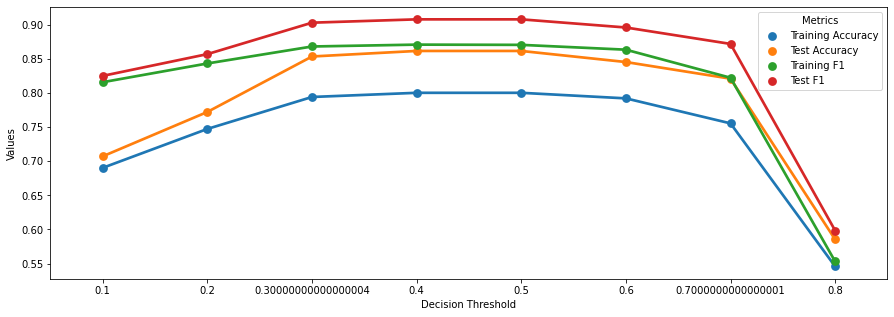

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

for thresh in np.arange(0.1, 0.9, 0.1):
    logreg_clf = LogisticRegression(solver="liblinear")
    logreg_clf.fit(X_train, y_train)
    
    #predict_proba(예측확률)의 출력은 각 클래스에 대한 확률
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:, 1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:, 1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)
    
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
thresh = 0.4 # Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123
